### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [662]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [663]:
data = pd.read_csv('data/coupons.csv')

In [664]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [665]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

The total number of rows is 12684 and datatype is object or int. 

Some columns like 'Bar' or 'car' have some nan or null values.


In [666]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [667]:
data['car'].isna().sum()

12576

In [668]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [669]:
data['Bar'].isna().sum()

107

We can see that 'car' and 'Bar' columns have nan values. 

In the case of the 'car' column, it count for a large proportion of the rows as we can see it in the bar plot below (the blue line represents the total number of rows, i.e. 12684 rows):

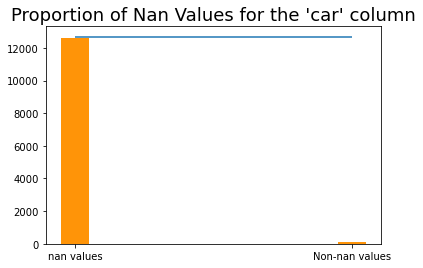

In [670]:
plt.bar(x=['nan values','Non-nan values'],
        height=[data['car'].isna().sum(),
                data['car'].notna().sum()
               ],
        color='#ff9408',
        width=0.1
       )

plt.hlines(y=data['car'].shape[0],
           xmin=0,
           xmax='Non-nan values'
          )

plt.title('Proportion of Nan Values for the \'car\' column', 
          fontdict={'fontsize':18}
         );



In [671]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

Among all columns containing nan values, there is one who seems much more particular, namely the 'car' column as we have seen above. It has only 108 non-null values out of 12684. One possibility could be to just drop all rows containing nan values. But if we do that, we could lose a lot of precious data and finish with just 108 rows as it is shown below:

In [672]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1237 to 8297
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           108 non-null    object
 1   passanger             108 non-null    object
 2   weather               108 non-null    object
 3   temperature           108 non-null    int64 
 4   time                  108 non-null    object
 5   coupon                108 non-null    object
 6   expiration            108 non-null    object
 7   gender                108 non-null    object
 8   age                   108 non-null    object
 9   maritalStatus         108 non-null    object
 10  has_children          108 non-null    int64 
 11  education             108 non-null    object
 12  occupation            108 non-null    object
 13  income                108 non-null    object
 14  car                   108 non-null    object
 15  Bar                   108 non-null  

In [673]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

Nevertheless, we should question oursleves if this data contained in the 'car' column is relevant for our study. 

The values contained in this column show particular values like 'do not drive' who can influence the decision to accept or not the coupon. For example, maybe the person refuses the coupon because they don't drive, but maybe they could accept it in the case they drive. This means the coupon is not a bad idea, and so, this would mean that persons who drive can  more likely accept the coupon. So one possible solution, instead of dropping this column, can be to complete nan values with some type of car. 

I decide to fill the missing values with a standard one because otherwise we would end up with so few data that could eventually penalize our analysis.

In [674]:
data['car'].fillna(value='Mazda5', inplace=True)

Once we have filled the missing values in the most problematic column, we can drop the rows containing missing values in the other columns since the proportion of missing values is not very high.


In [675]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   12684 non-null  object
 15  Bar                   12577 non-null

In [676]:
 miss_val = data.count().sort_values(ascending=True)[0:6]/data.shape[0]

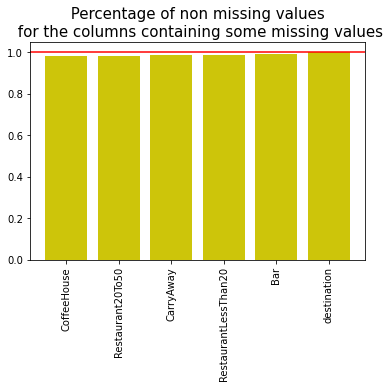

In [677]:
plt.bar(x=miss_val.index,
        height=miss_val.values, 
        color='#cdc50a'
       )
plt.axhline(y=1,
            xmin=0,
            xmax=1, 
            color='red'
           ) #miss_val.index[-1], miss_val.index[0]

plt.xticks(rotation=90)

plt.title(' Percentage of non missing values \n for the columns containing some missing values', 
          fontdict={'fontsize':15}
         );

In [678]:
data.dropna(inplace=True)



In [679]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  car                   12079 non-null  object
 15  Bar                   12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [680]:
 total_obs = data.shape[0]

In [681]:
accept = data['Y'].sum()

### Proportion of accepted coupons among the total number of observations

In [682]:
accept

6877

### Proportion of accepted coupons among the total number of observations

In [683]:
prprtn_accptd = accept/total_obs
prprtn_accptd

0.5693352098683666

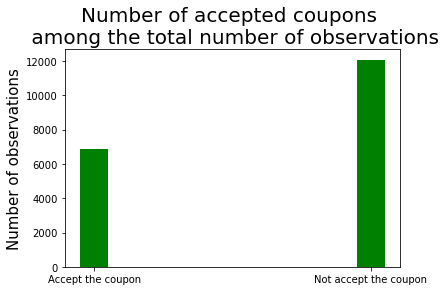

In [684]:
plt.bar(x=['Accept the coupon', 'Not accept the coupon'],
       height=[accept,total_obs],
       width=0.1, 
        color='green'
       )

plt.title('Number of accepted coupons \n among the total number of observations', 
          fontdict={'fontsize':20}
         );
plt.ylabel('Number of observations', size=15);


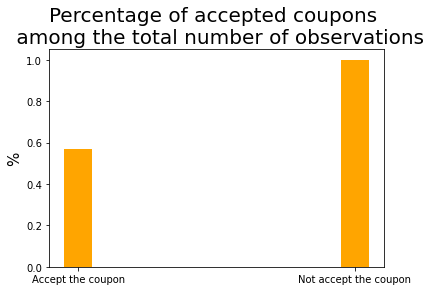

In [685]:
plt.bar(x=['Accept the coupon', 'Not accept the coupon'],
       height=[accept/total_obs,total_obs/total_obs],
       width=0.1, 
        color='orange'
       )

plt.title('Percentage of accepted coupons \n among the total number of observations', 
          fontdict={'fontsize':20}
         );
plt.ylabel('%', size=15);


5. Use a bar plot to visualize the `coupon` column.

According to the previous questions (data.info()), the 'coupon' column has no numeric values. 

In [686]:
data['coupon']

22             Restaurant(<20)
23                Coffee House
24                         Bar
25       Carry out & Take away
26                Coffee House
                 ...          
12679    Carry out & Take away
12680    Carry out & Take away
12681             Coffee House
12682                      Bar
12683        Restaurant(20-50)
Name: coupon, Length: 12079, dtype: object

So we need to count the values for each type present in this column

In [687]:
coupon_x = data['coupon'].value_counts(ascending=True).index.values
coupon_y = data['coupon'].value_counts(ascending=True).values

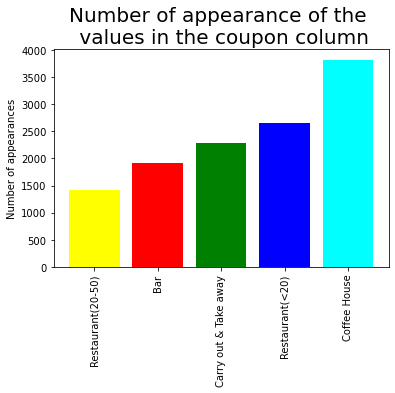

In [688]:
colors = ['yellow', 'red', 'green', 'blue', 'cyan']
plt.bar(coupon_x, coupon_y, color=colors)
plt.title('Number of appearance of the \n values in the coupon column', fontdict={'fontsize':20})
plt.ylabel('Number of appearances')
plt.xticks(rotation=90)
plt.show()


6. Use a histogram to visualize the temperature column.

We can have a quick look on what are the kind of values that are contained in the temperature column

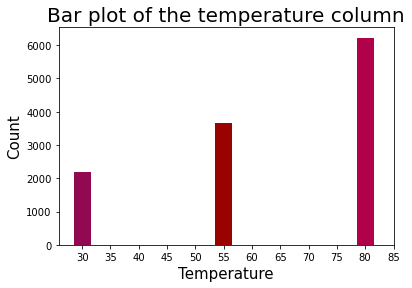

In [689]:
colors_hist = ['#b00149','#9a0200','#910951']

plt.bar(x = data['temperature'].value_counts().index, 
        height=data['temperature'].value_counts(), 
        width=3,
        color=colors_hist
        
       )

plt.title('Bar plot of the temperature column', 
          fontdict={'fontsize':20}
         )

plt.xticks(np.arange(30,90,5))
plt.xlabel('Temperature', size=15)
plt.ylabel('Count', size=15)
plt.show()

We then repeat the exercise but with a Density set to True to have a look.

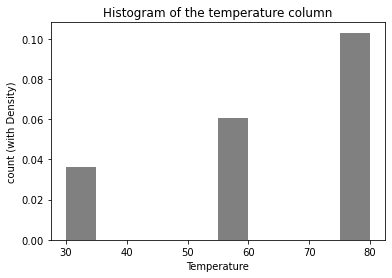

In [690]:
plt.hist(data['temperature'], color='gray', density=True)
plt.title('Histogram of the temperature column')
plt.xlabel('Temperature')
plt.ylabel('count (with Density)')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


We begin by filtering the data whose rows contains "Bar" in the coupon column

In [691]:
data_bar_coupon = data[data['coupon']=='Bar']

Let's verify that we pick up the right values

In [692]:
data_bar_coupon['coupon'].unique()

array(['Bar'], dtype=object)

In [693]:
data_bar_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [694]:
total_bar_coupons = data_bar_coupon.shape[0]
total_bar_coupons

1913

In [695]:
bar_coupons_accpeted = data_bar_coupon['Y'].sum()
bar_coupons_accpeted

788

### Proportion of bar coupons accepted

In [696]:
bar_coupons_accpeted / total_bar_coupons


0.41191845269210664

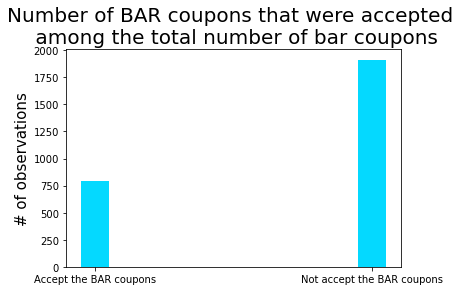

In [697]:
plt.bar(x=['Accept the BAR coupons', 
           'Not accept the BAR coupons'
          ],
        
        height=[bar_coupons_accpeted,
               total_bar_coupons
              ],
        width=0.1, 
        color='#04d9ff'
       )

plt.title('Number of BAR coupons that were accepted \n among the total number of bar coupons', 
          fontdict={'fontsize':20}
         );
plt.ylabel('# of observations', 
           size=15
          );


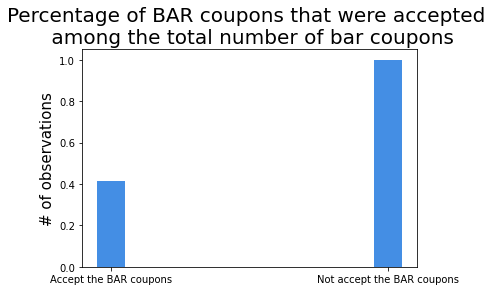

In [698]:
plt.bar(x=['Accept the BAR coupons', 
           'Not accept the BAR coupons'
          ],
        
        height=[bar_coupons_accpeted/total_bar_coupons,
               total_bar_coupons/total_bar_coupons
              ],
        width=0.1, 
        color='#448ee4'
       )

plt.title('Percentage of BAR coupons that were accepted \n among the total number of bar coupons', 
          fontdict={'fontsize':20}
         );
plt.ylabel('# of observations', 
           size=15
          );


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [699]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

 ### Acceptance rate of those who went to a bar 3 or fewer times a month 

In [700]:
bar_LT_3xM = data_bar_coupon['Bar'].isin(['never', 'less1', '1~3']).sum()
acc_rate_LT_3xM = bar_LT_3xM / data_bar_coupon.shape[0]
acc_rate_LT_3xM

0.8991113434396236

 ### Acceptance rate of those who went to a bar more than 3 times a month 

In [701]:
bar_GT_3xM = data_bar_coupon['Bar'].isin(['gt8', '4~8']).sum()
acc_rate_GT_3xM = bar_GT_3xM / data_bar_coupon.shape[0]
acc_rate_GT_3xM

0.10088865656037638

As we can see, the rate of those who went to a bar 3 or fewer times a month is much more important than for those who went more than 3 times.

We verify that both results sum up to one

In [702]:
acc_rate_GT_3xM+acc_rate_LT_3xM

1.0

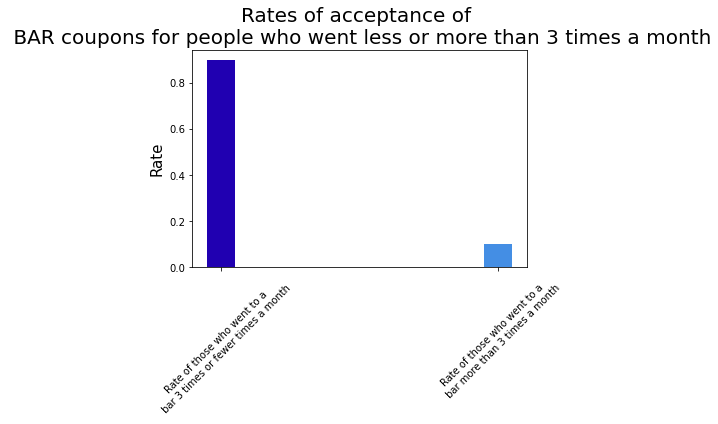

In [703]:
plt.bar(x=['Rate of those who went to a \n bar 3 times or fewer times a month', 
           'Rate of those who went to a \n bar more than 3 times a month'
          ],
        
        height=[acc_rate_LT_3xM,
               acc_rate_GT_3xM
              ],
        width=0.1, 
        color=['#2000b1','#448ee4']
       )

plt.title('Rates of acceptance of \n BAR coupons for people who went less or more than 3 times a month', 
          fontdict={'fontsize':20}
         );
plt.ylabel('Rate', 
           size=15
          )
plt.xticks(rotation=45);


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [704]:
data_bar_coupon['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [705]:
drive_bar_GT1M_older25 = data_bar_coupon[(data_bar_coupon['Bar'].isin(['1~3','gt8', '4~8'])) & 
                                         (data_bar_coupon['age'].isin(['46', '26', '31', '41', '50plus', '36']))
                                        ].shape[0]

### Rate of acceptance between drivers who go to a bar MORE  than once a month and are OLDER than 25 to the all others. 

In [706]:
rate_drive_bar_GT1M_older25 = drive_bar_GT1M_older25 / data_bar_coupon.shape[0]
rate_drive_bar_GT1M_older25

0.21066387872451647

### Rate of acceptance between drivers who go to a bar MORE  than once a month and are YOUNGER than 25 to the all others. 

In [707]:
drive_bar_GT1M_younger25 = data_bar_coupon[(data_bar_coupon['Bar'].isin(['1~3','gt8', '4~8'])) & 
                                         (data_bar_coupon['age'].isin(['21','below21']))
                                        ].shape[0]


rate_drive_bar_GT1M_younger25 = drive_bar_GT1M_younger25 / data_bar_coupon.shape[0]
rate_drive_bar_GT1M_younger25

0.08834291688447465

The acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is relatively low, just about 6.9%. If we compare it to the previous rates, it is still low.


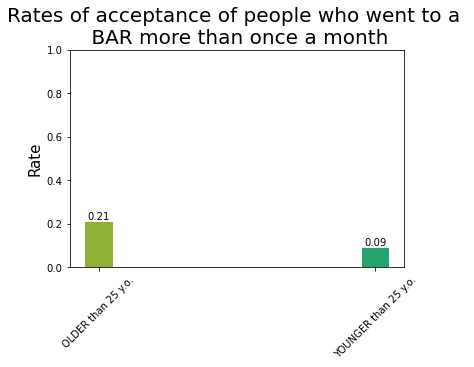

In [708]:
barplot = plt.bar(x=['OLDER than 25 y.o.', 
                     'YOUNGER than 25 y.o.'
                    ],
        
        height=[rate_drive_bar_GT1M_older25,
               rate_drive_bar_GT1M_younger25
              ],
        width=0.1, 
        color=['#90b134','#25a36f']
       )

plt.title('Rates of acceptance of people who went to a \n BAR more than once a month', 
          fontdict={'fontsize':20}
         );
plt.ylabel('Rate', 
           size=15
          )
plt.ylim([0,1])

plt.xticks(rotation=45);

plt.bar_label(barplot,
              labels=[round(rate_drive_bar_GT1M_older25,2),
                      round(rate_drive_bar_GT1M_younger25,2)
                      ],
              label_type='edge');



The previous plot shows that for the people who went to a BAR more than once a month, there is no big absolute difference between people who are older or younger than 25 years old. Though, it is worth it notice that the rate for those who are older than 25 years old is twice the rate for those younger than 25 years old.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


We look for the occupation as indicated in the instructions

In [709]:
job_look_for = np.delete(data['occupation'].unique(),
                         np.where(data['occupation'].unique() == 'Farming Fishing & Forestry'
                                 )
                        )


In [710]:
data['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [711]:
passangers_no_kid = data[~(data['passanger']=='Kid(s)')]['passanger'].unique()
passangers_no_kid

array(['Alone', 'Friend(s)', 'Partner'], dtype=object)

In [712]:
driver_bar_GT1xM_no_kid_no_farm = data_bar_coupon[(data_bar_coupon['Bar'].isin(['gt8', '4~8','1~3'])) & 
                                                  (data_bar_coupon['passanger'].isin(passangers_no_kid)) &
                                                  (data_bar_coupon['occupation'].isin(job_look_for))
                                                 ].shape[0]
driver_bar_GT1xM_no_kid_no_farm

530

### Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

In [713]:
rate_driver_bar_GT1xM_noKid_noFarm = driver_bar_GT1xM_no_kid_no_farm / data_bar_coupon.shape[0]
rate_driver_bar_GT1xM_noKid_noFarm

0.2770517511761631

This time, the rate was about **27.7%**. 


Thanks to this results, we can deduce the acceptance rate of the drivers who go to bars less  than once a month or had passengers that were a kid or whose occupations was "farming, fishing, or forestry".

In [714]:
1- rate_driver_bar_GT1xM_noKid_noFarm

0.7229482488238369

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



### Go to bars more than once a month, had passengers that were not a kid, and were not widowed

We need to analyze the data in the 'maritalStatus' column in order to know which one we need to discard (we are looking for not widow)

In [715]:
data_bar_coupon['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [716]:
notWid = data[~(data['maritalStatus']=='Widowed')]['maritalStatus'].unique()

In [717]:
driver_1 = data_bar_coupon[(data_bar_coupon['Bar'].isin(['1~3','gt8', '4~8'])) &
                           (data_bar_coupon['passanger'].isin(passangers_no_kid)) &
                           (data_bar_coupon['maritalStatus'].isin(notWid))
                           ].shape[0]
driver_1

530

In [718]:
acc_rate_driver_1 = driver_1 / data_bar_coupon.shape[0]
acc_rate_driver_1

0.2770517511761631

### Go to bars more than once a month and are under the age of 30 


Now we analyse the data of the age column in order to chose those who are under the age of 30

In [719]:
data_bar_coupon['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [720]:
under30 = ['21','26','below21']

In [721]:
driver_2 = data_bar_coupon[(data_bar_coupon['Bar'].isin(['1~3','gt8', '4~8'])) & 
                           (data_bar_coupon['age'].isin(under30))
                           ].shape[0]
driver_2

328

In [722]:
acc_rate_driver_2 = driver_2 / data_bar_coupon.shape[0]
acc_rate_driver_2

0.17145844223732357

### Go to cheap restaurants more than 4 times a month and income is less than 50K.

Finally and similarly, we check the values in the CarryAway column

In [723]:
data_bar_coupon['CarryAway'].unique()

array(['4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

And we check the values in the income column so that we chose the income that are less than 50

In [724]:
data_bar_coupon['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

We need to create a function that determines the salaries that are less

In [725]:
LT50K = []
for i in data_bar_coupon['income'].unique():
    min_val = (i.replace('$','')).split(sep=' ')[0]
    if (min_val =='Less'):
        LT50K.append(i)
    else :
        if (int(min_val) < 50000):
            LT50K.append(i)

In [726]:
LT50K

['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500']

In [727]:
driver_3 = data_bar_coupon[(data_bar_coupon['CarryAway'].isin(['4~8','gt8'])) & 
                           (data_bar_coupon['income'].isin(LT50K))
                           ].shape[0]
driver_3

454

In [728]:
acc_rate_driver_3 = driver_3 / data_bar_coupon.shape[0]
acc_rate_driver_3

0.23732357553580763

### Summary of acceptance rates

The rates that were asked are, respectively:

In [729]:
print('* Go to bars more than once a month, had passengers that were not a kid, and were not widowed = '+str(acc_rate_driver_1)),
print('\n')
print('* Go to bars more than once a month and are under the age of 30 = ' + str(acc_rate_driver_2) ),
print('\n')
print('* Go to cheap restaurants more than 4 times a month and income is less than 50K = ' + str(acc_rate_driver_3))

# acc_rate_driver_1,acc_rate_driver_2,acc_rate_driver_3

* Go to bars more than once a month, had passengers that were not a kid, and were not widowed = 0.2770517511761631


* Go to bars more than once a month and are under the age of 30 = 0.17145844223732357


* Go to cheap restaurants more than 4 times a month and income is less than 50K = 0.23732357553580763


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The overall rates are less than 30%. Those who accepted the coupons more were those who had passangers that were not a kid, who were not widowed and who went to bar usually more than once a month. 

This can help to target this audience and to adapt the strategy to the others.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

We decide to investigate the coupon related to the WEATHER. We can intuitively think that when weather is Sunny, there might be more people accepting some coupons, but even if it is sunny, do people accept coupons more when it is rather cold (30 °F) or warm (80 °F) ?  We will try to answer these questions with a data-based analysis.

When it is sunny, we check how many temperatures are possible.

In [730]:
data[data['weather']=='Sunny']['temperature'].unique()

array([55, 80, 30], dtype=int64)

 A. We firstly create a new DataFrame that contains just the sunny weather.

In [731]:
data_sunny = data[data['weather']=='Sunny']

In [732]:
data_sunny

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,0
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1
12678,Home,Partner,Sunny,30,10PM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0


In [733]:
data_sunny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9601 entries, 22 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           9601 non-null   object
 1   passanger             9601 non-null   object
 2   weather               9601 non-null   object
 3   temperature           9601 non-null   int64 
 4   time                  9601 non-null   object
 5   coupon                9601 non-null   object
 6   expiration            9601 non-null   object
 7   gender                9601 non-null   object
 8   age                   9601 non-null   object
 9   maritalStatus         9601 non-null   object
 10  has_children          9601 non-null   int64 
 11  education             9601 non-null   object
 12  occupation            9601 non-null   object
 13  income                9601 non-null   object
 14  car                   9601 non-null   object
 15  Bar                   9601 non-null 

We observe that our new data frame contains 9601 rows and none of them contains null values

Now we check if our new Dataframe has some non values

In [734]:
nan_cols = [i for i in data_sunny.columns if data_sunny[i].isnull().any()]
nan_cols

[]

There is no null or nan value in our new data frame called data_sunny

B. Now, we analyse what proportion of coupons were accepted.

In [735]:
tot_sunny_accpt = data_sunny['Y'].sum()
tot_sunny_accpt

5713

In [736]:
prop_sunny_accpt = tot_sunny_accpt/data_sunny.shape[0]
prop_sunny_accpt

0.5950421831059265

#### When weather is sunny, **59%** of people accept the coupon (whatever the coupon is).

Among these persons who accepted the coupons in a sunny day, we analyse how many of those coupons were for a coffee house

In [737]:
sunny_accpt = data_sunny[data_sunny['Y']==1]
sunny_accpt_were_coffee = sunny_accpt[sunny_accpt['coupon']=='Coffee House']
tot_sun_accpt_coffee = sunny_accpt_were_coffee['Y'].sum()
tot_sun_accpt_coffee

1661

In [738]:
tot_sun_accpt_coffee / data_sunny[data_sunny['coupon']=='Coffee House'].shape[0]

0.5009047044632087

#### When it was a sunny day, **50%** of the coupons that were accepted were for a Coffee Hhouse

In [739]:
tot_sun_accpt_coffee / data_sunny.shape[0]

0.17300281220706176

#### The number of accepted coupons for a Coffee House were 17% of all coupons offered in a sunny day

Now, we observe, among all the coupons that were offered in a sunny day, what were the proportions of coupons in different temperatures.

In [740]:
sunny_30 = data_sunny[data_sunny['temperature']==30]
sunny_55 = data_sunny[data_sunny['temperature']==55]
sunny_80 = data_sunny[data_sunny['temperature']==80]

In [741]:
coupons_at_30 = sunny_30.shape[0]/data_sunny.shape[0]
coupons_at_55 = sunny_55.shape[0]/data_sunny.shape[0]
coupons_at_80 = sunny_80.shape[0]/data_sunny.shape[0]

In [742]:
print('Coupons that were offered in a Sunny day at 30 ºF are {:.2f}'.format(coupons_at_30*100))
print('Coupons that were offered in a Sunny day at 55 ºF are {:.2f}'.format(coupons_at_55*100))
print('Coupons that were offered in a Sunny day at 80 ºF are {:.2f}'.format(coupons_at_80*100))

Coupons that were offered in a Sunny day at 30 ºF are 9.00
Coupons that were offered in a Sunny day at 55 ºF are 26.20
Coupons that were offered in a Sunny day at 80 ºF are 64.81


We observe that most of the coupons offered in a Sunny day concern a temperate of 80 ºF

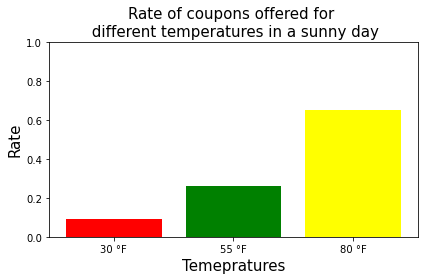

In [743]:
plt.bar(x=['30 °F','55 °F','80 °F'], 
        height=[coupons_at_30,coupons_at_55,coupons_at_80], 
        color=['red','green','yellow'])
plt.title('Rate of coupons offered for \n different temperatures in a sunny day', size=15)
plt.ylabel('Rate', size=15)
plt.xlabel('Temepratures', size=15)
plt.tight_layout()
plt.ylim(0,1);

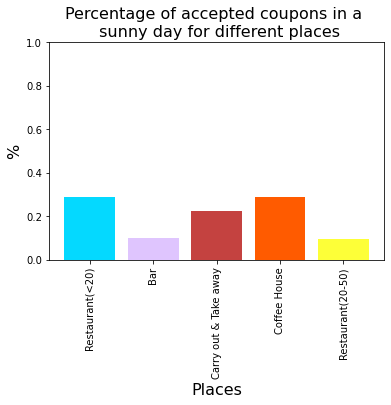

In [744]:
sunny_accpt = data_sunny[data_sunny['Y']==1]
nb_per_place = []
for place in sunny_accpt['coupon'].unique():
    sunny_accpt_which_place = sunny_accpt[sunny_accpt['coupon']==place]
    tot_sun_accpt_place = sunny_accpt_which_place['Y'].sum()
    nb_per_place.append(tot_sun_accpt_place/sunny_accpt.shape[0])
        
plt.bar(x=sunny_accpt['coupon'].unique(),
        height=nb_per_place, 
       color=['#04d9ff','#dfc5fe','#c44240','#ff5b00','#fdff38'])
plt.title('Percentage of accepted coupons in a \n sunny day for different places', size=16)
plt.xlabel('Places', size=16)
plt.ylabel('%', size=16)
plt.ylim(0,1)
plt.xticks(rotation=90);

We can conclude that, in a sunny day, 59% of people accept the coupon (whatever the coupon is).

And, when the weather is sunny, and if the coupon is accepted, then the most popular places are (increasing order):

* Coffee House: **29.07%**
* Restaurant(<20): **28.72%**
* Carry Out & Take Away: **22.56%**
* Bar: **9.92%**
* Restaurant(20-50): **9.71%**